In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
valores = pd.read_csv("./dados/sp_ka.csv").valor

529900

Text(0.5, 1.0, 'Histograma de Preços')

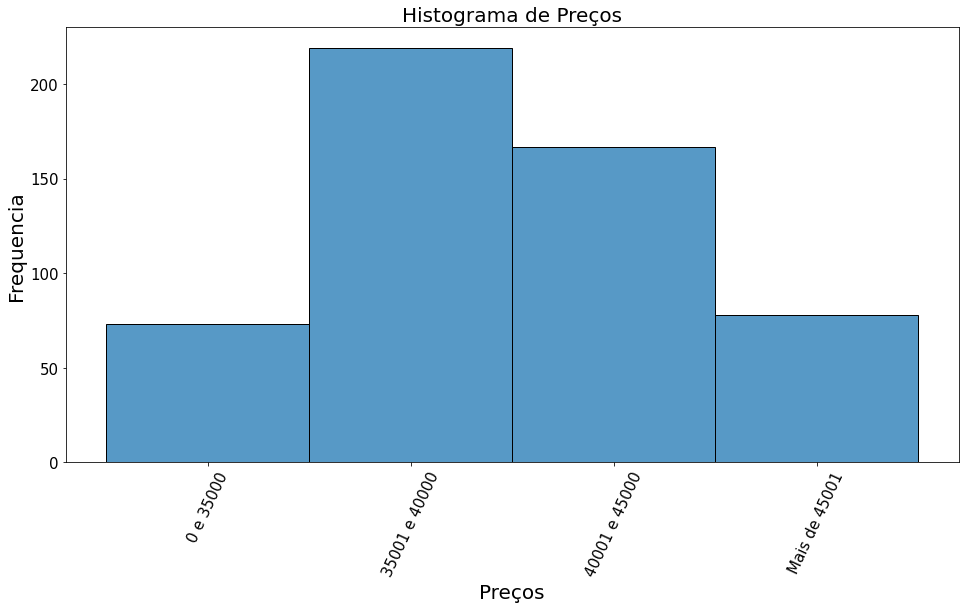

In [62]:
bins = [0, 35000, 40000, 45000, 90000]
labels = ['0 e 35000', '35001 e 40000','40001 e 45000','Mais de 45001']

valores_hist = pd.cut(valores, bins,
                      labels=labels, include_lowest=True)

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.histplot(data=valores_hist, binwidth=3)
# valores.hist(grid=False)
plt.xticks(rotation=65)
plt.xlabel('Preços', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Histograma de Preços', fontsize=20)


In [ ]:
file = "se_completo"
colnames = ['Loss']
train_losses = pd.read_csv(
    f'./resultados/{file}/train_loss_epoch_{file}.csv', names=colnames, header=None)
test_losses = pd.read_csv(
    f'./resultados/{file}/test_loss_epoch_{file}.csv', names=colnames, header=None)
dif_train = pd.read_csv(
    f'./resultados/{file}/train_loss_{file}.csv', names=colnames, header=None)
dif_test = pd.read_csv(
    f'./resultados/{file}/test_loss_{file}.csv', names=colnames, header=None)



In [ ]:
dif_array = []
for index, row in dif_train.iterrows():
    dif_array.append(round(float(row.Loss), 2))

# for index, row in dif_test.iterrows():
#     temp.append(round(float(row.Loss), 2))

dif = pd.DataFrame({"Loss": dif_array})

In [ ]:
dif_array.sort(reverse=True)
print(dif_array[0])
x = 0
bins = []
labels = []
while (True):
    string = f"Entre {x+1} e "
    bins.append(x)
    if(x > dif_array[0]):
        break
    x += 1000
    string += f"{x}"
    labels.append(string)


pd.cut(dif.Loss, bins,
       labels=labels, include_lowest=True).value_counts()

print(bins[31:35])
print(labels[31:35])

In [ ]:
bins = [0, 2500, 3000, 3500, 10000, 20000, 42000] 
labels = ['1 e 2500', '2501 e 3000', '3001 e 3500', '3501 e 10000', '10001 e 20000', 'Mais de 20001']

dif_hist = pd.cut(dif.Loss, bins,
                  labels=labels, include_lowest=True)

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.histplot(data=dif_hist, binwidth=3)
plt.xticks(rotation=45)
plt.xlabel('Residuos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Histograma Residual', fontsize=20)
plt.legend()
